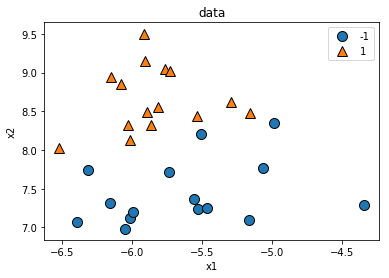

In [202]:
from sklearn.datasets import make_blobs
import mglearn
#X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
X, y = make_blobs(n_samples=30, centers=2, cluster_std=0.5, random_state=5)

#print(X.shape)
#print(X)
#print(y.shape)
#print(y)

y = 2 * y -1 #-1,1로 나누기 위해

#print(y)

#plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
#plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")

mglearn.discrete_scatter(X[:,0],X[:,1],y) #똑같다

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("data")
plt.show()

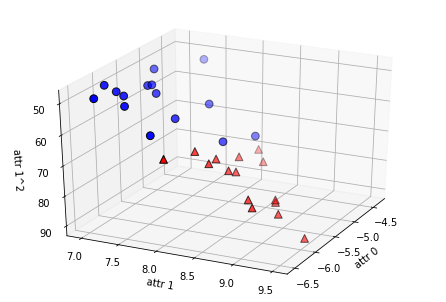

In [203]:
import matplotlib.pyplot as plt

import mglearn

from sklearn.svm import SVC

from sklearn.datasets import make_blobs

import numpy as np


# 두 번째 특성을 제곱하여 추가

X_new = np.hstack([X, X[:, 1:] ** 2])



from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

# 3차원 그래프

ax = Axes3D(figure, elev=-152, azim=-26)



# y==0인 포인트를 먼저 그리고 그다음 y==1인포인트를 그린다.

mask = y == -1

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, marker="^", s=60, edgecolor='k')

ax.set_xlabel("attr 0")

ax.set_ylabel("attr 1")

ax.set_zlabel("attr 1^2")

plt.show()

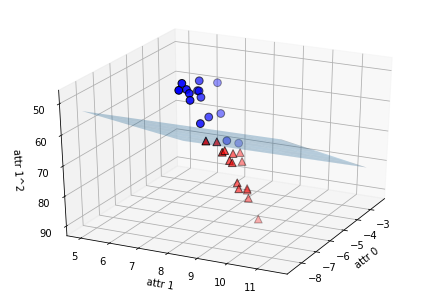

In [204]:
# Linaer SVC분류기로 훈련해보기

linear_svm_3d = SVC(kernel = 'linear').fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_



# 선형 결정 경계 그리기

figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)

yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)



XX, YY = np.meshgrid(xx, yy)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]



ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)



# y==0인 포인트를 먼저 그리고 그다음 y==1인포인트를 그린다.

mask = y == -1

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, marker="^", s=60, edgecolor='k')

ax.set_xlabel("attr 0")

ax.set_ylabel("attr 1")

ax.set_zlabel("attr 1^2")

plt.show()
